In [1]:
%pwd

'/disk7T/ypguo/FedScale'

In [2]:
import os
os.chdir('/disk7T/ypguo/FedScale')
%pwd
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import torch

In [3]:
# Make sure you have downloaded and installed FedScale
# import sys as _sys
# print(_sys.argv[0])
# print(_sys.argv[1:])
import fedscale.cloud.config_parser as parser
from fedscale.dataloaders.femnist import FEMNIST
from fedscale.dataloaders.utils_data import get_data_transform
from fedscale.dataloaders.divide_data import DataPartitioner


In [4]:
train_transform, test_transform = get_data_transform('mnist')
train_dataset = FEMNIST('./benchmark/dataset/data/femnist', dataset='train', transform=train_transform)
test_dataset = FEMNIST('./benchmark/dataset/data/femnist', dataset='test', transform=test_transform)

In [5]:

# Partition the dataset by the client_data_mapping file, which gives the real-world client-level heterogeneity.
parser.args.task = 'cv'
training_sets = DataPartitioner(data=train_dataset, args=parser.args, numOfClass=62)
training_sets.partition_data_helper(num_clients=None, data_map_file='./benchmark/dataset/data/femnist/client_data_mapping/train.csv')
testing_sets = DataPartitioner(data=test_dataset, args=parser.args, numOfClass=62, isTest=True)
testing_sets.partition_data_helper(num_clients=None, data_map_file='./benchmark/dataset/data/femnist/client_data_mapping/train.csv')

In [6]:
# Partition the dataset by the client_data_mapping file, which gives the real-world client-level heterogeneity.
parser.args.task = 'cv'
training_sets = DataPartitioner(data=train_dataset, args=parser.args, numOfClass=62)
training_sets.partition_data_helper(num_clients=None, data_map_file='./benchmark/dataset/data/femnist/client_data_mapping/train.csv')
testing_sets = DataPartitioner(data=test_dataset, args=parser.args, numOfClass=62, isTest=True)
testing_sets.partition_data_helper(num_clients=None, data_map_file='./benchmark/dataset/data/femnist/client_data_mapping/train.csv')

In [7]:
print(f'Total number of data samples: {training_sets.getDataLen()}')
print(f'Total number of clients: {training_sets.getClientLen()}')

Total number of data samples: 637877
Total number of clients: 2800


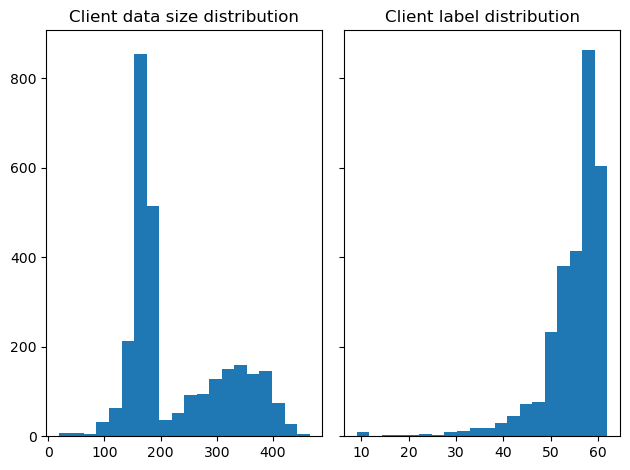

In [8]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
size_dist = training_sets.getSize()['size']

n_bins = 20
axs[0].hist(size_dist, bins=n_bins)
axs[0].set_title('Client data size distribution')

label_dist = training_sets.getClientLabel()
axs[1].hist(label_dist, bins=n_bins)
axs[1].set_title('Client label distribution')

plt.show()